In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
myfont = matplotlib.font_manager.FontProperties(fname=r'E:\Anaconda2\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\myinghwl.ttf') 

In [3]:
data=pd.read_csv("F:/data/duiying.csv",encoding='gbk',index_col=0)
data

,免费干货,线上课程,线下课程,纸质书籍,收费社群/圈子,线下会议/活动/沙龙,同事/同行/领导交流
0-1万,94,75,7,48,21,11,36
1万-5万,46,35,5,21,16,9,29
5万-10万,14,20,1,15,14,9,15
10万-30万,27,23,3,12,8,5,26
30万-100万,20,15,1,5,7,5,14
100万以上,11,9,1,5,1,3,13


In [4]:
cp=data

In [5]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码

In [10]:
class Ca(object):
    def __init__(self,dim=2):
        self.dim=dim
    def ca(self,data):
        data_array=np.array(data)
        total=data_array.sum().sum()
        row_percent=data_array.sum(axis=1)/float(total)
        row_percent=np.array(row_percent,dtype=float)
        col_percent=data_array.sum(axis=0)/float(total)
        col_percent=np.array(col_percent,dtype=float)
        p=data_array/float(total)
        product=np.outer(row_percent.reshape(-1,1),col_percent.reshape(-1,1))
        center=p-product
        
        chi_squared=float(total)*((center**2)/product).sum().sum()
        row_sqrt_I=np.diag(1/np.sqrt(row_percent))
        col_sqrt_I=np.diag(1/np.sqrt(col_percent))
        resid=np.dot(np.dot(row_sqrt_I,center),col_sqrt_I)
        resid=np.array(resid,dtype=float)
        U,D_lamb,V_T=np.linalg.svd(resid,full_matrices=False)
        inertias=D_lamb**2
        D_lamb_array=np.diag(D_lamb)
        percent=inertias/float(inertias.sum())
        cumulative_percent=[]
        cp=0
        for i in percent:
            cp=cp+1
            cumulative_percent.append(cp)
        chisquare_list=chi_squared * percent
        chisquare_list=[float(item) for item in chisquare_list]
        row_coords_all=np.dot(np.dot(row_sqrt_I,U),D_lamb_array)
        col_coords_all=np.dot(np.dot(col_sqrt_I,V_T.T),D_lamb_array.T)
        
        row_coords=np.dot(np.dot(row_sqrt_I,U),D_lamb_array)[:,:self.dim]
        row_coords.T[1]=-row_coords.T[1]
        col_coords=np.dot(np.dot(col_sqrt_I,V_T.T),D_lamb_array.T)[:,:self.dim]
        col_coords.T[1]=-col_coords.T[1]
        self.data=data
        self.total=total
        self.p=p
        self.row_coords_all=row_coords_all
        self.col_coords_all=col_coords_all
        self.row_coords=row_coords
        self.col_coords=col_coords
        self.singular_value=D_lamb
        self.principal_inertia=inertias
        self.percent=percent
        self.cumulative_percent=cumulative_percent
        self.chi_squared=chi_squared
        self.chisquare_list=chisquare_list
    
    def get_coords(self):
        row_coords_df=pd.DataFrame(data=self.row_coords,index=self.data.index,columns=["dim1","dim2"])
        col_coords_df=pd.DataFrame(data=self.col_coords,index=self.data.columns,columns=["dim1","dim2"])
        print(row_coords_df)
        print(col_coords_df)
    
    def summary(self):
        sv=pd.DataFrame(self.singular_value).astype('float16')
        pi=pd.DataFrame(self.principal_inertia).astype('float16')
        chi=pd.DataFrame(self.chisquare_list).astype('float16')
        per=pd.DataFrame(self.percent).astype('float16')
        cuper=pd.DataFrame(self.cumulative_percent).astype('float16')
        summary_df=pd.concat([sv,pi,chi,per,cuper],axis = 1)
        summary_df.columns=["Singular Value","Principal Inertia","Chi-square","Percent","Cumulative Percent"]
        return summary_df
    
    def caplot(self):
        x_c=self.col_coords.T[0]
        y_c=self.col_coords.T[1]
        x_r=self.row_coords.T[0]
        y_r=self.row_coords.T[1]
        fig=plt.figure(figsize=(15,12))
        plt.scatter(x_r,y_r,c='r',marker='o')
        plt.scatter(x_c,y_c,c='b',marker='+',s=50)
        plt.title('Plot of  Two variabels')
        plt.xlabel('dim1'+""+"("+'%.2f%%' % (self.percent[0]*100)+")")
        plt.ylabel('dim2'+""+"("+'%.2f%%' % (self.percent[1]*100)+")")
        zipxy_c=zip(x_c,y_c)
        for (x,y) in zipxy_c:
            plt.annotate((list(data.columns))[zipxy_c.index((x,y))],xy=(x,y),xytext=(x,y),xycoords="data",textcoords='offset points',ha='center',va='top',fontproperties=myfont)
        zipxy_r=zip(x_r,y_r)
        for (x,y) in zipxy_r:
            plt.annotate((list(data.index))[zipxy_r.index((x,y))],xy=(x,y),xytext=(x,y),xycoords="data",textcoords='offset points',ha='center',va='top',fontproperties=myfont)

In [7]:
cp_ca=Ca()
cp_ca.ca(cp)
cp_ca.summary()

,Singular Value,Principal Inertia,Chi-square,Percent,Cumulative Percent
0,0.165283,0.027298,20.609375,0.513672,1.0
1,0.140747,0.019821,14.960938,0.372803,2.0
2,0.062500,0.003910,2.951172,0.073486,3.0
3,0.041534,0.001724,1.301758,0.032440,4.0
4,0.020401,0.000416,0.314209,0.007828,5.0
5,0.000000,0.000000,0.000000,0.000000,6.0


In [8]:
cp_ca.get_coords()

              dim1      dim2
0-1万      0.185959  0.045544
1万-5万    -0.021440 -0.008836
5万-10万   -0.288208  0.274495
10万-30万  -0.098849 -0.166301
30万-100万 -0.128793 -0.072307
100万以上   -0.152944 -0.323070
                dim1      dim2
免费干货        0.157914 -0.059386
线上课程        0.063270  0.031274
线下课程        0.110285 -0.136207
纸质书籍        0.088940  0.143774
收费社群/圈子    -0.209383  0.264873
线下会议/活动/沙龙 -0.336930  0.123405
同事/同行/领导交流 -0.209847 -0.215515


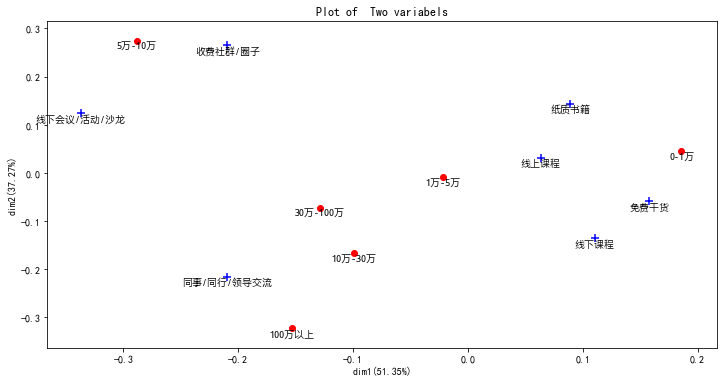

In [11]:
cp_ca.caplot()